In [4]:
# Train a multi-layer perceptron on the data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import MLPfunctions as mlp
import importlib
from sklearn.model_selection import train_test_split

# Create a dataframe from the csv file
dataset = pd.read_csv('HIGGS_train.csv')
# Make the dataset much smaller
dataset_small = dataset.sample(frac=0.1)
# Set aside a validation set
data_val = dataset_small.sample(frac=0.2)
dataset_small.drop(data_val.index, inplace=True)
X_val = data_val.iloc[:, 1:].values
y_val = data_val.iloc[:, 0].values
# Split the data into features and labels
X = dataset_small.iloc[:, 1:].values
y = dataset_small.iloc[:, 0].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

# Print all the sizes
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

# Convert the data to PyTorch tensors
X_train = torch.FloatTensor(X_train,)
X_test = torch.FloatTensor(X_test)
X_val = torch.FloatTensor(X_val)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)
y_val = torch.tensor(y_val, dtype=torch.long)


(563200, 28)
(140800, 28)
(176000, 28)


Epoch 1/1000, Train Loss: 0.6926048398017883, Test Loss: 0.6906638145446777
Epoch 2/1000, Train Loss: 0.6908861994743347, Test Loss: 0.6886932253837585
Epoch 3/1000, Train Loss: 0.6888175010681152, Test Loss: 0.686869740486145
Epoch 4/1000, Train Loss: 0.6869093179702759, Test Loss: 0.6841893792152405
Epoch 5/1000, Train Loss: 0.6841983199119568, Test Loss: 0.6812817454338074
Epoch 6/1000, Train Loss: 0.6812379956245422, Test Loss: 0.6778526306152344
Epoch 7/1000, Train Loss: 0.6776395440101624, Test Loss: 0.6739832162857056
Epoch 8/1000, Train Loss: 0.6737032532691956, Test Loss: 0.6701022982597351
Epoch 9/1000, Train Loss: 0.6699104905128479, Test Loss: 0.6674392819404602
Epoch 10/1000, Train Loss: 0.6670078635215759, Test Loss: 0.6639191508293152
Epoch 11/1000, Train Loss: 0.6638497710227966, Test Loss: 0.6608469486236572
Epoch 12/1000, Train Loss: 0.660578727722168, Test Loss: 0.6586856842041016
Epoch 13/1000, Train Loss: 0.6583480834960938, Test Loss: 0.6572625041007996
Epoch 14/1

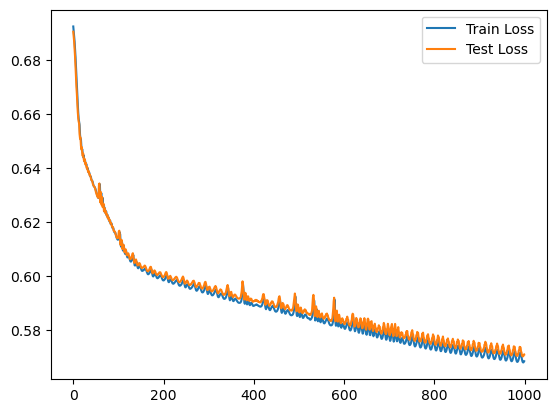

In [5]:
# Create the model
hidden_size = 30
model = mlp.MLP_mach1(28, 30)
# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
lr = .01
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
n_epochs = 1000
# Train the model using our function
train_losses, test_losses = mlp.train_model(model, X_train, y_train, X_test, y_test, criterion, optimizer, n_epochs)
# Make predictions on the validation set
f1, acc, cm = mlp.getResults(train_losses, test_losses, model, X_val, y_val)
# Print the results
print("F1:" + str(f1))
print("Accuracy:" + str(acc))
print("Confusion Matrix:")
print(cm)


In [2]:
# Now lets see how our mach2 model does
# Set the size for four hidden layers and the dropout rate
model2 = mlp.MLP_mach2(28, 90, 60, 30, 10, 0.2)
# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
lr = .01
optimizer = torch.optim.Adam(model2.parameters(), lr=lr)
n_epochs = 1000
# Train the model using our function
train_losses, test_losses = mlp.train_model(model2, X_train, y_train, X_test, y_test, criterion, optimizer, n_epochs)
# Make predictions on the validation set
f1, acc, cm = mlp.getResults(train_losses, test_losses, model2, X_val, y_val)
print("F1:" + str(f1))
print("Accuracy:" + str(acc))
print("Confusion Matrix:")
print(cm)

Epoch 1/1000, Train Loss: 0.6926771402359009, Test Loss: 0.7332876920700073
Epoch 2/1000, Train Loss: 0.7413896322250366, Test Loss: 0.6900086402893066
Epoch 3/1000, Train Loss: 0.6903097629547119, Test Loss: 0.6927592158317566
Epoch 4/1000, Train Loss: 0.6926077008247375, Test Loss: 0.6931831240653992
Epoch 5/1000, Train Loss: 0.6931264400482178, Test Loss: 0.6928303241729736
Epoch 6/1000, Train Loss: 0.6928853988647461, Test Loss: 0.692236065864563
Epoch 7/1000, Train Loss: 0.6923028826713562, Test Loss: 0.6914823055267334
Epoch 8/1000, Train Loss: 0.6916278600692749, Test Loss: 0.6906424760818481
Epoch 9/1000, Train Loss: 0.690965473651886, Test Loss: 0.6898762583732605
Epoch 10/1000, Train Loss: 0.6903938055038452, Test Loss: 0.6892203688621521
Epoch 11/1000, Train Loss: 0.6899413466453552, Test Loss: 0.6885350942611694
Epoch 12/1000, Train Loss: 0.6894693970680237, Test Loss: 0.6875686645507812
Epoch 13/1000, Train Loss: 0.6885146498680115, Test Loss: 0.6865113377571106
Epoch 14/1

KeyboardInterrupt: 

In [10]:
importlib.reload(mlp)

model3 = mlp.MLP_mach3(28, 300, 250, 200, 150, 100, 50, 0.2)
# Set the criterion and optimizer
criterion = nn.CrossEntropyLoss()
lr = .001
optimizer = torch.optim.Adam(model3.parameters(), lr=lr)
n_epochs = 100
# Train the model using our function
train_losses, test_losses = mlp.train_model(model3, X_train, y_train, X_test, y_test, criterion, optimizer, n_epochs)


Epoch 1/100, Train Loss: 0.692429780960083, Test Loss: 0.6921226382255554
Epoch 2/100, Train Loss: 0.692003071308136, Test Loss: 0.6918318271636963
Epoch 3/100, Train Loss: 0.6916661262512207, Test Loss: 0.6915619969367981
Epoch 4/100, Train Loss: 0.691385805606842, Test Loss: 0.6913436651229858
Epoch 5/100, Train Loss: 0.691175639629364, Test Loss: 0.6910753846168518
Epoch 6/100, Train Loss: 0.6908677816390991, Test Loss: 0.6904028058052063
Epoch 7/100, Train Loss: 0.6903401017189026, Test Loss: 0.6894748210906982
Epoch 8/100, Train Loss: 0.6895642280578613, Test Loss: 0.6885915994644165
Epoch 9/100, Train Loss: 0.6888293623924255, Test Loss: 0.6871492266654968
Epoch 10/100, Train Loss: 0.6875709295272827, Test Loss: 0.6849786043167114
Epoch 11/100, Train Loss: 0.6858924627304077, Test Loss: 0.6827300190925598
Epoch 12/100, Train Loss: 0.684144139289856, Test Loss: 0.6800819039344788
Epoch 13/100, Train Loss: 0.6816034913063049, Test Loss: 0.6781975030899048
Epoch 14/100, Train Loss: 

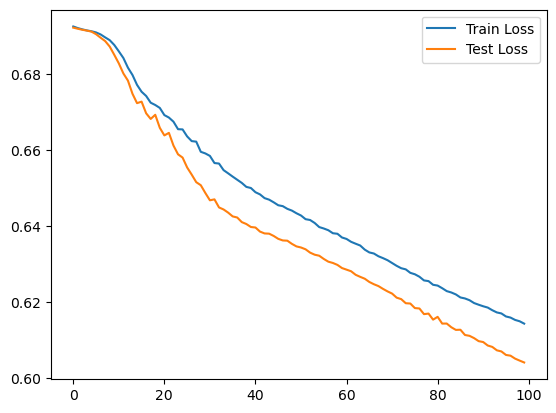

In [11]:
f1, acc, cm = mlp.getResults(train_losses, test_losses, model3, X_val, y_val)